# Connection to NoSQL laboratory

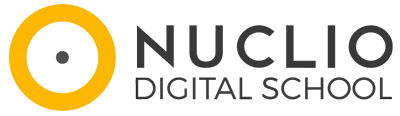

This notebook will give us an understanding of MongoDB and how it interacts with Python.

We'll start by installing the pymongo library with the extra needed to connect to the cluster.

In [ ]:
# install pymongo with the server option
!/usr/bin/python3 -m pip install "pymongo[srv]"

Then we import the libraries needed to connect with mongoDB  

In [ ]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

In case of preparing your own mongoDB cluster (https://www.mongodb.com/cloud/atlas/register), you will need the colab IP address.

In [ ]:
!curl ipecho.net/plain

## Setting up the connection string

First, we initalize the connection object. 

In [ ]:
# connection string parameters
# these are the parameters to acess MY server 
# in case of running YOUR mongoDB custer, the user and password are the 
# ones YOU defined
username='nds_guest' 
password='Nuclio22'
# the host must be the DNS 
host='nds-mongodb' # my server DNS

# create connection string
connStr='mongodb+srv://'+username+':'+password+'@'+host+'.glonb.mongodb.net/'

# if running MongoDB locally
# connStr = 'mongodb://localhost:27017'
print(connStr)

# instantiate engine
conn = MongoClient(connStr)

The connection is only established when we interact with the server (as in the code below). 

The piece of code should run without error.

In [ ]:
# test connection to server
db = conn.test

After testing the connection, we should be able to see a peak in the usage on the cluster monitoring frontend:

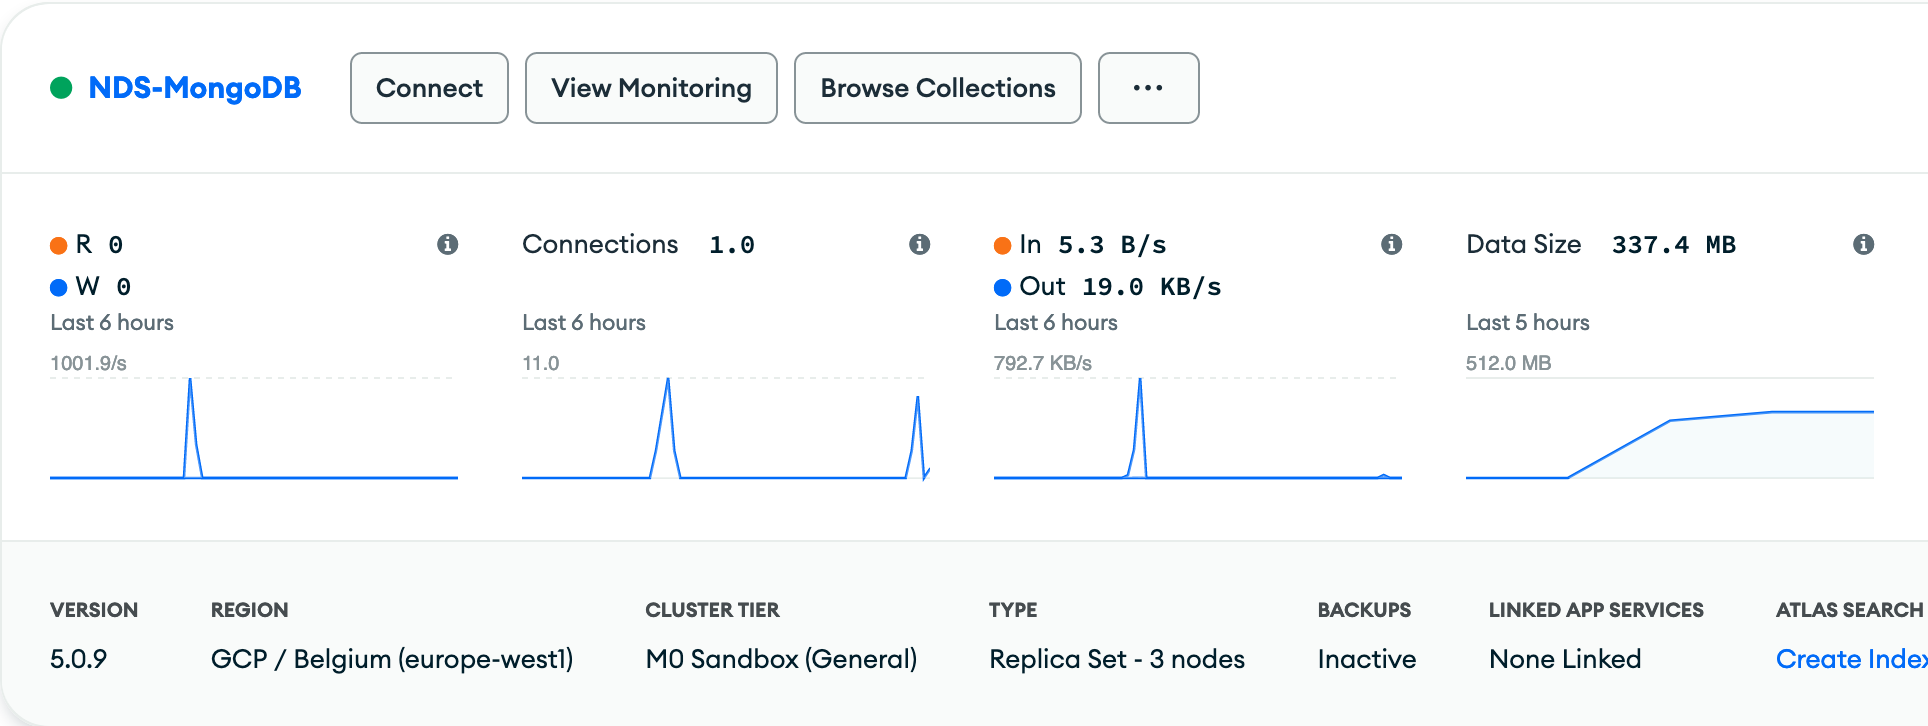

## Administrator Role

In [ ]:
# we assign an instance of the administrator object or administrator roles with 
# the admin property 
# we must ensure that we have an admin role
# only admins can list databases and check status
client = conn.admin

This command allows to access metadata about our server and our connection.
There is a lot of information. Some interesting info:
- *host*: your host name
- *version*: the MongoDB version
- *connections available*: number of connections possible at the same time

In [ ]:
client.command("serverStatus")

### List databases

MySQL equivalent:

```sql
SHOW DATABASES
```

In [ ]:
# see the list of available databases
conn.list_database_names()

# CRUD commands

## [C] Create

### Create database

In [ ]:
# instantiate a new database called NUCLIO 
db_nuclio = conn.nuclio

In [ ]:
# check if the database was created:
conn.list_database_names()

**No**!! The database is not yet available! It's only created when we insert documents!

### Insert documents

In [19]:
# not a dictionary -> it's a JSON object 
mestrado1 = {
    "nome" : "Data Science",
    "ano_letivo": 2022,
}

mestrado2 = {
    "nome" : "UX/UI",
    "ano_letivo": 2021,
}

mestrado3 = {
    "nome" : "Product Management",
}

mestrado4 = {
    "profesores" : ["João", "Inês"],
}

The documents do not have a common structure: as you see, mestrado3 does not have the field "ano_letivo". This is ok 😀

In [ ]:
# insert one document in db nuclio
db_nuclio.mestrados.insert_one(mestrado1);

In [ ]:
# db_nuclio = conn.nuclio
# conn -> connection object
# database -> nuclio
# collection -> mestrados
# function -> insert_one
conn.nuclio.mestrados.insert_one(mestrado2);

In [15]:
# check the database
conn.list_database_names()

['nuclio',
 'sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'admin',
 'local']

Now we have the nuclio database in the list of databases!

In [16]:
# check the database collection
db_nuclio.list_collection_names()

['mestrados']

Use the *insert_many* command to insert the remaining documents:

In [20]:
db_nuclio.mestrados.insert_many([mestrado3, mestrado4]);

## [R] Read

### Count

The method *count_documents* allow filters, so if we want to count all documents, we must substitute the filter by *{}* (empty JSON).

Count documents is equivalent to the following MySQL query:

```sql
SELECT COUNT(*) FROM table
```

In [21]:
# check the number of documents
db_nuclio.mestrados.count_documents({})

4

As we inserted 4 documents, the number of documents available in the collection "mestrados" is 4.

### Find


The *find* function is equivalent to the following MySQL query:

```sql
SELECT * FROM table
```

**NOTE**:
the result of the find method must be converted into a list to be able to visualize and treat it. In itself, it's a cursor type object, that is, a pointer to a memory item. To see the content itself, we must first transform it to a list.

In [22]:
list(db_nuclio.mestrados.find())

[{'_id': ObjectId('644ed7e4be4f53694a4e8760'),
  'nome': 'Data Science',
  'ano_letivo': 2022},
 {'_id': ObjectId('644ed80fbe4f53694a4e8761'),
  'nome': 'UX/UI',
  'ano_letivo': 2021},
 {'_id': ObjectId('644ed910be4f53694a4e8763'), 'nome': 'Product Management'},
 {'_id': ObjectId('644ed910be4f53694a4e8764'), 'profesores': ['João', 'Inês']}]

As we analyse the result above, we see that:
1. it's a list, containing the 4 elements (that we've previously inserted)
2. each document is a JSON object
3. as we have not defined any keys in our documents, mongoDB added one ('_id')

Let´s switch to a database populated with more information: *sample_airbnb*

In [23]:
# equal to create command -> if DB exists, use it. If not, create a new one
db_bnb = conn.sample_airbnb

# check the collections
db_bnb.list_collection_names()

['listingsAndReviews']

**Let's use some filters**:

Our filters are also documents. If we want to filter houses with minimum stays equals to three days, we create the following document:

```json
{
  "accommodates" : 15
}
```

It is equivalent to the following MySQL query:

```sql
SELECT * FROM table WHERE accommodates=15
```

In [24]:
list(db_bnb.listingsAndReviews.find({"accommodates": 15}))

[{'_id': '20701559',
  'listing_url': 'https://www.airbnb.com/rooms/20701559',
  'name': 'Venue Hotel Old City',
  'summary': 'Venue Hotel is set in the Fatih district in Istanbul, 200 metres from Sirkeci Tram Station. This hotel features free WiFi. Each room at this hotel is air conditioned and features a flat-screen TV and a kettle. Free toiletries,towels and a hairdryer in the bathrooms with daily cleaning. You will find a 24-hour front desk at the property.  Grand Bazaar is 1.3 km from Venue, while Topkapi Palace is 1.5 km from the property. Honeymoon package wine,roses are extra cost.',
  'space': '',
  'description': 'Venue Hotel is set in the Fatih district in Istanbul, 200 metres from Sirkeci Tram Station. This hotel features free WiFi. Each room at this hotel is air conditioned and features a flat-screen TV and a kettle. Free toiletries,towels and a hairdryer in the bathrooms with daily cleaning. You will find a 24-hour front desk at the property.  Grand Bazaar is 1.3 km from 

We can use the same filter to count the documents:

In [25]:
db_bnb.listingsAndReviews.count_documents({"accommodates": 15})

3

Now let's use the operator AND:

```json
{
  "$and": [
    {"accommodates": {"$gt":15}},
    {"minimum_nights": "3"}
  ]
},
{
  "accommodates": 1, 
  "minimum_nights": 1
}
```

To select only some fields, we add a new document with the name of the fields to be selected followed by the number 1 (boolean meaning TRUE): `{"field": 1}`

It is equivalent to the following MySQL query:

```sql
SELECT _id, accommodates, minimum_nights
FROM table 
WHERE accomodates > 15
AND minimum_nights="3"
```

MongoDB returns always the _id, even if it's not selected.

In [26]:
list(db_bnb.listingsAndReviews.find({
  "$and": [
    {"accommodates": {"$gt":15}},
    {"minimum_nights": "3"}
  ]
},
{
  "accommodates": 1, 
  "minimum_nights": 1
}
))

[{'_id': '19587001', 'minimum_nights': '3', 'accommodates': 16},
 {'_id': '4742607', 'minimum_nights': '3', 'accommodates': 16}]

### Aggregate

To use this method, three parameters are passed (as a list of dictionaries):

1. **$match**: the equivalent of the WHERE clause (in SQL)

2. **$group**: the fields by which we are going to group 

3. **$sort**: the fields by which we are going to sort

The next query is equivalent to the following MySQL query:

```sql
SELECT COUNT(*) AS num_properties
FROM table_name
GROUP BY property_type
```

In [29]:
# define the filter arrangement of dictionaries
l_params = [
    {
        "$group": {
            # _id internal mongoDB code to indicate in the value, the name 
            # of the field on which we are going to aggregate
            # a $ is included in front of the field name that acts as _id
            "_id": "$property_type",
            # num_properties is the name of the resulting added field
            # {"$sum": 1} means add one per each new element of the group added
            # it's the same as counting
            "num_properties": {"$sum": 1}
          }
     }
]
result_find = list(db_bnb.listingsAndReviews.aggregate(l_params))
result_find

[{'_id': 'Guest suite', 'num_properties': 81},
 {'_id': 'Boutique hotel', 'num_properties': 53},
 {'_id': 'Aparthotel', 'num_properties': 23},
 {'_id': 'Hut', 'num_properties': 1},
 {'_id': 'Boat', 'num_properties': 2},
 {'_id': 'Resort', 'num_properties': 11},
 {'_id': 'Farm stay', 'num_properties': 9},
 {'_id': 'Nature lodge', 'num_properties': 2},
 {'_id': 'Chalet', 'num_properties': 2},
 {'_id': 'Camper/RV', 'num_properties': 2},
 {'_id': 'Heritage hotel (India)', 'num_properties': 1},
 {'_id': 'Apartment', 'num_properties': 4025},
 {'_id': 'Castle', 'num_properties': 1},
 {'_id': 'Hotel', 'num_properties': 26},
 {'_id': 'Cabin', 'num_properties': 15},
 {'_id': 'Villa', 'num_properties': 32},
 {'_id': 'Tiny house', 'num_properties': 7},
 {'_id': 'Guesthouse', 'num_properties': 50},
 {'_id': 'Barn', 'num_properties': 1},
 {'_id': 'Townhouse', 'num_properties': 108},
 {'_id': 'Hostel', 'num_properties': 34},
 {'_id': 'Serviced apartment', 'num_properties': 185},
 {'_id': 'B&B', 'num_

Check if the sum of properties is equal to the total number of documents available:

In [30]:
# count method
db_bnb.listingsAndReviews.count_documents({})

5555

In [31]:
# sum the values
sum([elem["num_properties"] for elem in result_find])

5555

The numbers are equal, meaning that 5555 documents with the property_type field

**Complex example of aggregating filter**:

pipeline:
```json
[
  {
    "$match": {
      "room_type": "Entire home/apt"
    }  
  },
  {
    "$group": {
      "_id": "$property_type",
      "num_properties": {"$sum": 1}
      }
  },
  {
    "$sort": {
      "num_properties": -1
      }
  }
]
```

SQL equivalent:

```sql
SELECT property_type, COUNT(*) AS num_properties
FROM table_name
WHERE room_type="Entire home/apt"
GROUP BY property_type
ORDER BY num_properties DESC
```

In [32]:
l_params = [
    {
        "$match": {
            # similar to the find method
            # equivalent to the WHERE sql clause
            "room_type": "Entire home/apt"
            }  
     },
     {
         "$group": {
             "_id": "$property_type",
             "num_properties": {"$sum": 1}
             }
      },
      {
          "$sort": {
              # key indicates the field used to sort
              # -1 (DESC) / 1 (ASC)
              "num_properties": -1
              }
       }
]

list(db_bnb.listingsAndReviews.aggregate(l_params))

[{'_id': 'Apartment', 'num_properties': 2668},
 {'_id': 'House', 'num_properties': 330},
 {'_id': 'Serviced apartment', 'num_properties': 133},
 {'_id': 'Loft', 'num_properties': 116},
 {'_id': 'Townhouse', 'num_properties': 61},
 {'_id': 'Guest suite', 'num_properties': 50},
 {'_id': 'Guesthouse', 'num_properties': 31},
 {'_id': 'Cottage', 'num_properties': 19},
 {'_id': 'Villa', 'num_properties': 18},
 {'_id': 'Cabin', 'num_properties': 9},
 {'_id': 'Other', 'num_properties': 9},
 {'_id': 'Bungalow', 'num_properties': 8},
 {'_id': 'Tiny house', 'num_properties': 5},
 {'_id': 'B&B', 'num_properties': 5},
 {'_id': 'Farm stay', 'num_properties': 4},
 {'_id': 'Boutique hotel', 'num_properties': 3},
 {'_id': 'Aparthotel', 'num_properties': 3},
 {'_id': 'Casa particular (Cuba)', 'num_properties': 2},
 {'_id': 'Resort', 'num_properties': 2},
 {'_id': 'Camper/RV', 'num_properties': 2},
 {'_id': 'Chalet', 'num_properties': 2},
 {'_id': 'Castle', 'num_properties': 1},
 {'_id': 'Barn', 'num_pro

Attention, in MongoDB the **order is very important**!! 

The following MongoDB query is equivalent to this MySQL query:

```sql
SELECT property_type, COUNT(*) AS num_properties
FROM table_name
WHERE room_type="Entire home/apt"
GROUP BY property_type
HAVING COUNT(*) >= 50
ORDER BY num_properties DESC
```

In [33]:
# THE ORDER IS VERY IMPORTANT
l_params = [
    {
        "$match": {
            "room_type": "Entire home/apt"
            } 
     },
     {
         "$group": {
             "_id": "$property_type",
             "num_properties": {"$sum": 1}
             }
      },
      {
          "$sort": {
              "num_properties": -1
              }
       },
       {
           "$match": {
               "num_properties": {"$gte":50}
               }  
        }
]

list(db_bnb.listingsAndReviews.aggregate(l_params))

[{'_id': 'Apartment', 'num_properties': 2668},
 {'_id': 'House', 'num_properties': 330},
 {'_id': 'Serviced apartment', 'num_properties': 133},
 {'_id': 'Loft', 'num_properties': 116},
 {'_id': 'Townhouse', 'num_properties': 61},
 {'_id': 'Guest suite', 'num_properties': 50}]

## [U] Update

⚠️**ATENÇÃO**⚠️: *update* é um comando que modifica a BD  - se a base de dados, pelo que no caso de já ter sido corrido, o resultado do próximo *find* será 0

In [36]:
# searching by Bed and Breakfast
db_bnb.listingsAndReviews.count_documents({"property_type": "Bed and Breakfast"})

69

In [37]:
# change all Bed and Breakfast to type B&B with detail Bed and Breakfast
filter_clause={"property_type": "Bed and Breakfast"}
set_clause={"$set": {"property_type": "B&B", "property_detail": "Bed and Breakfast"}}
db_bnb.listingsAndReviews.update_many(filter_clause, set_clause)

In [38]:
# searching by Bed and Breakfast - should return no documents
db_bnb.listingsAndReviews.count_documents({"property_type": "Bed and Breakfast"})

0

In [39]:
# searching by detail Bed and Breakfast 
db_bnb.listingsAndReviews.count_documents(
    {"property_type": "B&B", "property_detail": "Bed and Breakfast"}
)

69

## [D] Delete

In [40]:
# search by documents with ano_letivo = 2021
db_nuclio.mestrados.count_documents({"ano_letivo": 2021})

1

In [41]:
# remove all documents with ano_letivo = 2021
db_nuclio.mestrados.delete_many({"ano_letivo": 2021});

In [42]:
list(db_nuclio.mestrados.find())

[{'_id': ObjectId('644ed7e4be4f53694a4e8760'),
  'nome': 'Data Science',
  'ano_letivo': 2022},
 {'_id': ObjectId('644ed910be4f53694a4e8763'), 'nome': 'Product Management'},
 {'_id': ObjectId('644ed910be4f53694a4e8764'), 'profesores': ['João', 'Inês']}]

As you can see, all documents with ano_letivo = 2021 were removed

⚠️**ATENÇÃO**⚠️:

If you run 

```
db_nuclio.mestrados.delete_many()
```

without the condition, it will delete ALL DOCUMENTS


# Query Performance

We can use indexes to optimize our MongoDB queries. Check the documentation for more information: https://www.mongodb.com/docs/manual/indexes/

In [43]:
import pymongo

The following query lists the current available indexes. This is how to interpret the list:
- ('v', *number*): version 
- ('key', [(*field*, *order*), ...]): fields and their order to create the index
- ('name': *name*): index name

In [46]:
list(db_bnb.listingsAndReviews.list_indexes())

[SON([('v', 2), ('key', SON([('_id', 1)])), ('name', '_id_')]),
 SON([('v', 2), ('key', SON([('property_type', 1), ('room_type', 1), ('beds', 1)])), ('name', 'property_type_1_room_type_1_beds_1'), ('background', True)]),
 SON([('v', 2), ('key', SON([('name', 1)])), ('name', 'name_1'), ('background', True)]),
 SON([('v', 2), ('key', SON([('address.location', '2dsphere')])), ('name', 'address.location_2dsphere'), ('background', True), ('2dsphereIndexVersion', 3)])]

**before indexing**

We can use the *explain* command to see statistics about the executed query (in this case, the query is a find).

The most interesting fields are:
- *executionTimeMillis*: time to execute the query
- *totalKeysExamined*: keys used to execute the query
- *totalDocsExamined*: number of documents inspected to retrieve our result

In [47]:
db_bnb.listingsAndReviews.find({"accommodates": 15}).explain()

{'explainVersion': '1',
 'queryPlanner': {'namespace': 'sample_airbnb.listingsAndReviews',
  'indexFilterSet': False,
  'parsedQuery': {'accommodates': {'$eq': 15}},
  'queryHash': '97A49452',
  'planCacheKey': '97A49452',
  'maxIndexedOrSolutionsReached': False,
  'maxIndexedAndSolutionsReached': False,
  'maxScansToExplodeReached': False,
  'winningPlan': {'stage': 'COLLSCAN',
   'filter': {'accommodates': {'$eq': 15}},
   'direction': 'forward'},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 3,
  'executionTimeMillis': 376,
  'totalKeysExamined': 0,
  'totalDocsExamined': 5555,
  'executionStages': {'stage': 'COLLSCAN',
   'filter': {'accommodates': {'$eq': 15}},
   'nReturned': 3,
   'executionTimeMillisEstimate': 356,
   'works': 5557,
   'advanced': 3,
   'needTime': 5553,
   'needYield': 0,
   'saveState': 31,
   'restoreState': 31,
   'isEOF': 1,
   'direction': 'forward',
   'docsExamined': 5555},
  'allPlansExecution': []},
 'command': {

For this query the explain shows:
```json
{
  ...
  'executionTimeMillis': 376,
  'totalKeysExamined': 0,
  'totalDocsExamined': 5555,
  ...
}
```

**indexing**

Create an index for the field "accomodation":

In [48]:
db_bnb.listingsAndReviews.create_index([
    # we must chose a field to create the index, and then indicate if the index 
    # is ordered in ASC or DESC order
    ( "accommodates", pymongo.ASCENDING )],
    # we can define a name to the created index
     name="accommodation" 
);

**after indexing**

Explain the same query after creating the index.

In [50]:
db_bnb.listingsAndReviews.find({"accommodates": 15}).explain()

{'explainVersion': '1',
 'queryPlanner': {'namespace': 'sample_airbnb.listingsAndReviews',
  'indexFilterSet': False,
  'parsedQuery': {'accommodates': {'$eq': 15}},
  'queryHash': '97A49452',
  'planCacheKey': '431CBA3C',
  'maxIndexedOrSolutionsReached': False,
  'maxIndexedAndSolutionsReached': False,
  'maxScansToExplodeReached': False,
  'winningPlan': {'stage': 'FETCH',
   'inputStage': {'stage': 'IXSCAN',
    'keyPattern': {'accommodates': 1},
    'indexName': 'accommodation',
    'isMultiKey': False,
    'multiKeyPaths': {'accommodates': []},
    'isUnique': False,
    'isSparse': False,
    'isPartial': False,
    'indexVersion': 2,
    'direction': 'forward',
    'indexBounds': {'accommodates': ['[15, 15]']}}},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 3,
  'executionTimeMillis': 0,
  'totalKeysExamined': 3,
  'totalDocsExamined': 3,
  'executionStages': {'stage': 'FETCH',
   'nReturned': 3,
   'executionTimeMillisEstimate': 0,
   'w

For this query the explain shows:
```json
{
  ...
  'executionTimeMillis': 0,
  'totalKeysExamined': 3,
  'totalDocsExamined': 3,
  ...
}
```

**Much faster and efficient!**

In [45]:
# remove index, if needed
# db_bnb.listingsAndReviews.drop_index("accommodation")

# Dataframe <-> mongoDB

## Dataframe to mongoDB

To use dataframes we must transform our data in dictionaries.

In [51]:
# Create DataFrame
data = {
    'nome':["joao", "maria", "artur"], 
    'nacionalidade': ['portuguesa', 'brasileira', None]
    }
df_alunos = pd.DataFrame(data)

# print DataFrame
df_alunos

,nome,nacionalidade
0,joao,portuguesa
1,maria,brasileira
2,artur,None


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html

In [52]:
# transform dataframe into list
lst_alunos = df_alunos.to_dict(orient="records")
lst_alunos

[{'nome': 'joao', 'nacionalidade': 'portuguesa'},
 {'nome': 'maria', 'nacionalidade': 'brasileira'},
 {'nome': 'artur', 'nacionalidade': None}]

In [53]:
# insert into new collection: alunos
db_nuclio.alunos.insert_many(lst_alunos);

In [54]:
# check if the collection was created
db_nuclio.list_collection_names()

['mestrados', 'alunos']

In [55]:
# check if it's ok
list(db_nuclio.alunos.find())

[{'_id': ObjectId('644eef54be4f53694a4e8765'),
  'nome': 'joao',
  'nacionalidade': 'portuguesa'},
 {'_id': ObjectId('644eef54be4f53694a4e8766'),
  'nome': 'maria',
  'nacionalidade': 'brasileira'},
 {'_id': ObjectId('644eef54be4f53694a4e8767'),
  'nome': 'artur',
  'nacionalidade': None}]

We see that the documents contain None values. 

As you know, mongoDB is an unstructured database. That means that we can remove the fields without values. To do that, we must remove the values from the documents, and then add the documents to the database.

In [56]:
# remove the key-value pairs with None 
lst_alunos_new = [{k: v for k, v in my_dict.items() if v is not None} for my_dict in lst_alunos]
lst_alunos_new

[{'nome': 'joao',
  'nacionalidade': 'portuguesa',
  '_id': ObjectId('644eef54be4f53694a4e8765')},
 {'nome': 'maria',
  'nacionalidade': 'brasileira',
  '_id': ObjectId('644eef54be4f53694a4e8766')},
 {'nome': 'artur', '_id': ObjectId('644eef54be4f53694a4e8767')}]

In [57]:
# drop the current collection
db_nuclio.alunos.drop()

In [58]:
# create new one with corrected values
db_nuclio.alunos.insert_many(lst_alunos_new)

In [59]:
# check if it's ok
list(db_nuclio.alunos.find())

[{'_id': ObjectId('644eef54be4f53694a4e8765'),
  'nome': 'joao',
  'nacionalidade': 'portuguesa'},
 {'_id': ObjectId('644eef54be4f53694a4e8766'),
  'nome': 'maria',
  'nacionalidade': 'brasileira'},
 {'_id': ObjectId('644eef54be4f53694a4e8767'), 'nome': 'artur'}]

## mongoDB to DataFrame

mongoDB documents may sometimes be similar to tabular data. If so, we may convert our list of documents into a DataFrame.

**In case of having nested documents, this operation will create json values**

In [61]:
lst_bnb = list(db_bnb.listingsAndReviews.find({"minimum_nights": "15"}))

In [62]:
pd.DataFrame(lst_bnb)

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,host,address,availability,review_scores,reviews,property_detail,first_review,last_review,weekly_price,monthly_price
0,10069642,https://www.airbnb.com/rooms/10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,,Apartamento próximo ao centro dos Jogos Olímpi...,,,,,...,"{'host_id': '51670240', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 0, 'availability_60': 0, '...",{},[],NaN,NaT,NaT,NaN,NaN
1,11963985,https://www.airbnb.com/rooms/11963985,Cobertura de Luxo -Olimpíadas,"Nossa cobertura é muito aconchegante, moderna ...",,"Nossa cobertura é muito aconchegante, moderna ...",,Tempo de locação mínimo 15 dias,,,...,"{'host_id': '63901222', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, RJ, Brazil', 'subu...","{'availability_30': 27, 'availability_60': 57,...",{},[],NaN,NaT,NaT,NaN,NaN
2,12104860,https://www.airbnb.com/rooms/12104860,Apto Olimpíadas praia Barra Tijuca,"Apto amplo, confortável, em frente à praia da ...","Apartamento ventilado, com uma área de 190m2, ...","Apto amplo, confortável, em frente à praia da ...","O bairro da Barra da Tijuca é muito agradável,...",Estou alugando o apartamento todo por uma temp...,"Fácil acesso transportes públicos, táxis em d...",Podem ir à praia caminhando em 5 minutos. Terã...,...,"{'host_id': '63625732', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 0, 'availability_60': 0, '...",{},[],Condominium,NaT,NaT,NaN,NaN
3,12188649,https://www.airbnb.com/rooms/12188649,Apartamento Maracanã Olímpiadas,"Com 2 vagas de garagem ,Porteiro 24 horas, TV ...",,"Com 2 vagas de garagem ,Porteiro 24 horas, TV ...",,,,,...,"{'host_id': '65505273', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 30, 'availability_60': 60,...",{},[],NaN,NaT,NaT,NaN,NaN
4,12008712,https://www.airbnb.com/rooms/12008712,Barra da Tijuca: 2 suites overlooking the ocea...,"Apart-hotel, high floor, parking spot, swimmin...","Well situated building, with access to shoppin...","Apart-hotel, high floor, parking spot, swimmin...",The great diversity in the neighborhood and th...,"There is a food court next to the building, wi...",Plenty of transportation options in the area.,,...,"{'host_id': '64229195', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 28, 'availability_60': 58,...",{},[],NaN,NaT,NaT,NaN,NaN
5,12452082,https://www.airbnb.com/rooms/12452082,Stunning Apartmet for Rio 2016,"Three bedroom apartment renovated in 2015, in ...",,"Three bedroom apartment renovated in 2015, in ...",,,,,...,"{'host_id': '67370449', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 0, 'availability_60': 0, '...",{},[],NaN,NaT,NaT,NaN,NaN
6,13298973,https://www.airbnb.com/rooms/13298973,Cobertura com lazer - Olimpíadas,Meu espaço é perto de proximo aos parque olímp...,,Meu espaço é perto de proximo aos parque olímp...,,,,,...,"{'host_id': '71576305', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 23, 'availability_60': 53,...",{},[],NaN,NaT,NaT,NaN,NaN
7,13344796,https://www.airbnb.com/rooms/13344796,Hostel Próximo Parque Olímpico/ Projac BLUE 4,Casa ampla em rua tranquila. Todos os quartos ...,,Casa ampla em rua tranquila. Todos os quartos ...,,,,,...,"{'host_id': '41201909', 'host_url': 'https://w...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_communication': 10, 'review_sc...","[{'_id': '97976886', 'date': 2016-08-29 04:00:...",NaN,2016-08-29 04:00:00,2016-08-29 04:00:00,NaN,NaN
8,14375153,https://www.airbnb.com/rooms/14375153,Call it Home.,-My place is good for couples or One guest. Fa...,Clean and save. private. wind

Not very friendly, as you see...

My suggestion is to select only the fields relevant to our use case. Example:

In [63]:
#instead of converting the cursor into a list, we can convert immediatly into a DataFrame
pd.DataFrame( 
    db_bnb.listingsAndReviews.find(
        {"minimum_nights": "15"}, # where
        {"name": 1, "minimum_nights":1}) #select
    )

,_id,name,minimum_nights
0,10069642,Ótimo Apto proximo Parque Olimpico,15
1,11963985,Cobertura de Luxo -Olimpíadas,15
2,12104860,Apto Olimpíadas praia Barra Tijuca,15
3,12188649,Apartamento Maracanã Olímpiadas,15
4,12008712,Barra da Tijuca: 2 suites overlooking the ocea...,15
5,12452082,Stunning Apartmet for Rio 2016,15
6,13298973,Cobertura com lazer - Olimpíadas,15
7,13344796,Hostel Próximo Parque Olímpico/ Projac BLUE 4,15
8,14375153,Call it Home.,15
9,14140905,Beautiful Bushwick loft for August,15


In [ ]:
conn.close()